In [1]:
import numpy
import sklearn.datasets 

import matplotlib
import matplotlib.pyplot as plt

import scipy.linalg

In [2]:
def load_iris():

    import sklearn.datasets
    return sklearn.datasets.load_iris()['data'].T, sklearn.datasets.load_iris()['target']

def vcol(x):
    return x.reshape((x.size, 1))

def vrow(x):
    return x.reshape((1, x.size))

def compute_mu_C(D):
    mu = vcol(D.mean(1))
    C = ((D-mu) @ (D-mu).T) / float(D.shape[1])
    return mu, C

def compute_pca(D, m):

    mu, C = compute_mu_C(D)
    U, s, Vh = numpy.linalg.svd(C)
    P = U[:, 0:m]
    return P

def apply_pca(P, D):
    return P.T @ D

In [4]:
D, L = load_iris()
mu, C = compute_mu_C(D)
print(mu)
print(C)

[[5.84333333]
 [3.05733333]
 [3.758     ]
 [1.19933333]]
[[ 0.68112222 -0.04215111  1.26582     0.51282889]
 [-0.04215111  0.18871289 -0.32745867 -0.12082844]
 [ 1.26582    -0.32745867  3.09550267  1.286972  ]
 [ 0.51282889 -0.12082844  1.286972    0.57713289]]


In [12]:
# Not sorted
s, U = numpy.linalg.eig(C)
print(s)
print()
print(U)

[4.20005343 0.24105294 0.0776881  0.02367619]

[[ 0.36138659 -0.65658877 -0.58202985  0.31548719]
 [-0.08452251 -0.73016143  0.59791083 -0.3197231 ]
 [ 0.85667061  0.17337266  0.07623608 -0.47983899]
 [ 0.3582892   0.07548102  0.54583143  0.75365743]]


In [17]:
# Sorted in asc order
s, U = numpy.linalg.eigh(C)
print("eigenvalues:")
print(s)
print("\neigenvectors:")
print(U)
m = 2
P = U[:, ::-1][:, 0:m]
print("\nP:")
print(P)

eigenvalues:
[0.02367619 0.0776881  0.24105294 4.20005343]

eigenvectors:
[[ 0.31548719  0.58202985  0.65658877 -0.36138659]
 [-0.3197231  -0.59791083  0.73016143  0.08452251]
 [-0.47983899 -0.07623608 -0.17337266 -0.85667061]
 [ 0.75365743 -0.54583143 -0.07548102 -0.3582892 ]]

P:
[[-0.36138659  0.65658877]
 [ 0.08452251  0.73016143]
 [-0.85667061 -0.17337266]
 [-0.3582892  -0.07548102]]


In [5]:
P = compute_pca(D, m = 2)
print(P)

[[-0.36138659 -0.65658877]
 [ 0.08452251 -0.73016143]
 [-0.85667061  0.17337266]
 [-0.3582892   0.07548102]]


In [18]:
DP = apply_pca(P, D)
print(DP.shape)

(2, 150)


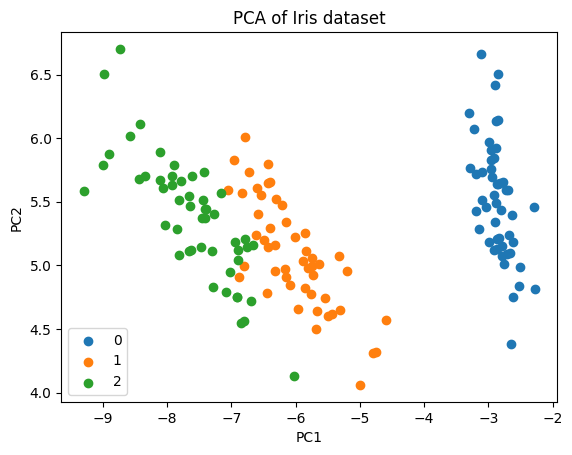

In [19]:
plt.figure()
for i in range(3):
    plt.scatter(DP[0, L == i], DP[1, L == i], label = str(i))
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA of Iris dataset')
plt.legend()
plt.show()